In [1]:
import sys
import os
import numpy as np
import pandas as pd
import sklearn.metrics
from matplotlib import pyplot as plt
from LRGradientDescent import LogisticRegressionGradientDescent

In [2]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

In [12]:
step_size = 0.25
alpha = 100
num_iterations = 30000
x_NF = np.loadtxt('data_digits_8_vs_9_noisy/x_train.csv',
        skiprows=1, delimiter=',')
y_N = np.loadtxt('data_digits_8_vs_9_noisy/y_train.csv',
        skiprows=1, delimiter=',')
N = y_N.size
n_rows_per_fold = int(np.ceil(N / float(3))) * np.ones(3, dtype=np.int32)
n_surplus = np.sum(n_rows_per_fold) - N
if n_surplus > 0:
    n_rows_per_fold[-n_surplus:] -= 1
fold_boundaries = np.hstack([0, np.cumsum(n_rows_per_fold)])
start_per_fold = fold_boundaries[:-1]
stop_per_fold = fold_boundaries[1:]

In [13]:
fold_start = start_per_fold[0]
fold_stop = stop_per_fold[0]
x_tr_NF = np.vstack([x_NF[:fold_start], x_NF[fold_stop:]])
y_tr_N = np.hstack([y_N[:fold_start], y_N[fold_stop:]])
x_va_NF = x_NF[fold_start:fold_stop].copy()
y_va_N = y_N[fold_start:fold_stop].copy()
lr = LogisticRegressionGradientDescent(
                step_size=step_size, alpha=alpha,
                num_iterations=num_iterations,
                init_w_recipe='zeros')
lr.fit(x_tr_NF, y_tr_N)

Initializing w_G with 785 features using recipe: zeros
Running up to 30000 iters of gradient descent with step_size 0.25
iter    0/30000  loss         1.000000  avg_L1_norm_grad         0.025008  w[0]    0.000 bias    0.000
iter    1/30000  loss         0.742611  avg_L1_norm_grad         0.038237  w[0]   -0.001 bias    0.000
iter    2/30000  loss         1.192841  avg_L1_norm_grad         0.121471  w[0]    0.003 bias    0.048
iter    3/30000  loss         3.692822  avg_L1_norm_grad         0.150124  w[0]   -0.010 bias   -0.078
iter    4/30000  loss         2.006077  avg_L1_norm_grad         0.151750  w[0]    0.007 bias    0.101
iter    5/30000  loss         3.100312  avg_L1_norm_grad         0.147756  w[0]   -0.010 bias   -0.060
iter    6/30000  loss         1.387247  avg_L1_norm_grad         0.123995  w[0]    0.007 bias    0.116
iter    7/30000  loss         1.547922  avg_L1_norm_grad         0.118207  w[0]   -0.007 bias   -0.015
iter    8/30000  loss         0.981332  avg_L1_norm_gra

iter  620/30000  loss         0.199259  avg_L1_norm_grad         0.000011  w[0]   -0.021 bias    0.293
iter  621/30000  loss         0.199259  avg_L1_norm_grad         0.000011  w[0]   -0.021 bias    0.293
iter  640/30000  loss         0.199259  avg_L1_norm_grad         0.000010  w[0]   -0.021 bias    0.294
iter  641/30000  loss         0.199259  avg_L1_norm_grad         0.000010  w[0]   -0.021 bias    0.294
iter  660/30000  loss         0.199258  avg_L1_norm_grad         0.000009  w[0]   -0.021 bias    0.294
iter  661/30000  loss         0.199258  avg_L1_norm_grad         0.000009  w[0]   -0.021 bias    0.294
iter  680/30000  loss         0.199258  avg_L1_norm_grad         0.000008  w[0]   -0.021 bias    0.295
iter  681/30000  loss         0.199258  avg_L1_norm_grad         0.000008  w[0]   -0.021 bias    0.295
iter  700/30000  loss         0.199257  avg_L1_norm_grad         0.000007  w[0]   -0.021 bias    0.295
iter  701/30000  loss         0.199257  avg_L1_norm_grad         0.000007

In [5]:
calc_confusion_matrix_for_threshold(y_va_N, yproba1_va_N, 0.5)

Predicted,0,1
True,,
0,1860,62
1,69,1943


In [15]:
FP_N = np.logical_and(y_va_N < 0.5, yproba1_va_N >= 0.5)
FN_N = np.logical_and(y_va_N > 0.5, yproba1_va_N < 0.5)


[False False False ..., False False False]


In [7]:
FP_loc_N = np.argwhere(FP_N == True)
FN_loc_N = np.argwhere(FN_N == True)

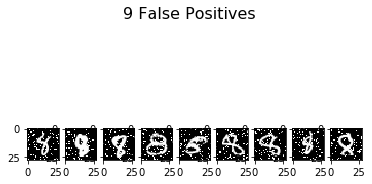

In [8]:
f, axlist = plt.subplots(1, 9, sharex=False)
f.suptitle('9 False Positives', fontsize=16)
for i in range(9):
    axlist[i].imshow(x_va_NF[FP_loc_N[i]].reshape(28,28), cmap="gray", vmin=0.0, vmax=1.0)

### 2C Caption, False Positives

I think these plots were labeled as 9s because it seems to focus on the upper loop as well as the line descending on the right. I think that if there is a line right below the loop, it looks somewhat like a 9, and therefore wil classify it as a 9 even though a bottom loop exists. Therefore, I think it is placing emphasis on certain areas of the picture, while other areas may need higher weights. 

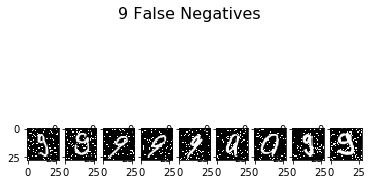

In [9]:
f, axlist = plt.subplots(1, 9, sharex=False)
f.suptitle('9 False Negatives', fontsize=16)
for i in range(9):
    axlist[i].imshow(x_va_NF[FN_loc_N[i]].reshape(28,28), cmap="gray", vmin=0.0, vmax=1.0)


### Caption for 2C, False Negatives
The mistakes my regression seems to make in terms of false negatives is the presence of some sort of either some sort of loop or the presence of a diagonal line on the bottom of the digit. In a normal 9, the bottom does not descend in a diagonal fashion, so my classifier seems to emphasize this in classifying whether or not a digit is a 8 or 9. Potentially, it may classify pictures as 8 based on curves present on the bottom half of the picture. 

### Plot for 2D

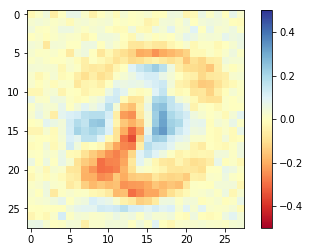

In [14]:
w_F = lr.w_G[:lr.w_G.shape[0]-1]
plt.imshow(w_F.reshape(28,28), cmap='RdYlBu', vmin=-0.5, vmax=0.5)
plt.colorbar()

### Caption for 2D

I noticed that the center is heavily concentrated in deciding whether or not the digit is an 8 or 9. According to the color map, it appears that curves present on the bottom of the picture will most likely classify a picture as an 8. What seems to have the largest weight in the picture seems to be a vertical line present to the right of the center of the photo, which makes some sense because a 9 versus an 8 seems to have a vertical line descending straight down right below the top loop, while the 8 does not. TO clarify, yellow means 9, blue means 8.  

### 2E Code


In [11]:
model = LogisticRegressionGradientDescent(
                step_size=0.25, alpha=100,
                num_iterations=10000,
                init_w_recipe='zeros')
model.fit(x_NF, y_N)

Initializing w_G with 785 features using recipe: zeros
Running up to 10000 iters of gradient descent with step_size 0.25
iter    0/10000  loss         1.000000  avg_L1_norm_grad         0.024599  w[0]    0.000 bias    0.000
iter    1/10000  loss         0.734119  avg_L1_norm_grad         0.033659  w[0]   -0.000 bias    0.001
iter    2/10000  loss         1.037097  avg_L1_norm_grad         0.108691  w[0]    0.003 bias    0.043
iter    3/10000  loss         3.338104  avg_L1_norm_grad         0.150644  w[0]   -0.008 bias   -0.069
iter    4/10000  loss         2.469970  avg_L1_norm_grad         0.158324  w[0]    0.009 bias    0.110
iter    5/10000  loss         3.023285  avg_L1_norm_grad         0.148645  w[0]   -0.008 bias   -0.058
iter    6/10000  loss         1.521529  avg_L1_norm_grad         0.129499  w[0]    0.009 bias    0.118
iter    7/10000  loss         1.644473  avg_L1_norm_grad         0.122608  w[0]   -0.005 bias   -0.018
iter    8/10000  loss         1.037744  avg_L1_norm_gra

iter  620/10000  loss         0.180261  avg_L1_norm_grad         0.000029  w[0]   -0.027 bias    0.346
iter  621/10000  loss         0.180260  avg_L1_norm_grad         0.000029  w[0]   -0.027 bias    0.347
iter  640/10000  loss         0.180256  avg_L1_norm_grad         0.000026  w[0]   -0.027 bias    0.348
iter  641/10000  loss         0.180255  avg_L1_norm_grad         0.000026  w[0]   -0.027 bias    0.348
iter  660/10000  loss         0.180252  avg_L1_norm_grad         0.000024  w[0]   -0.027 bias    0.349
iter  661/10000  loss         0.180251  avg_L1_norm_grad         0.000024  w[0]   -0.027 bias    0.349
iter  680/10000  loss         0.180248  avg_L1_norm_grad         0.000022  w[0]   -0.027 bias    0.350
iter  681/10000  loss         0.180248  avg_L1_norm_grad         0.000022  w[0]   -0.027 bias    0.350
iter  700/10000  loss         0.180245  avg_L1_norm_grad         0.000020  w[0]   -0.027 bias    0.351
iter  701/10000  loss         0.180245  avg_L1_norm_grad         0.000020

In [8]:
x_test_NF = np.loadtxt('data_digits_8_vs_9_noisy/x_test.csv', skiprows=1, delimiter=',')

yproba1_test_N = model.predict_proba(x_test_NF)[:, 1]

np.savetxt('yproba1_test.txt', yproba1_test_N)

### Caption for 2E

My training set for k folds error rate is 0.0333, while my error rate in the test set is 0.0337 which is slightly higher.
My test set results were: 
error rate: 0.033787191124558746
AUROC: 0.9949224942661834

See below for the table picture

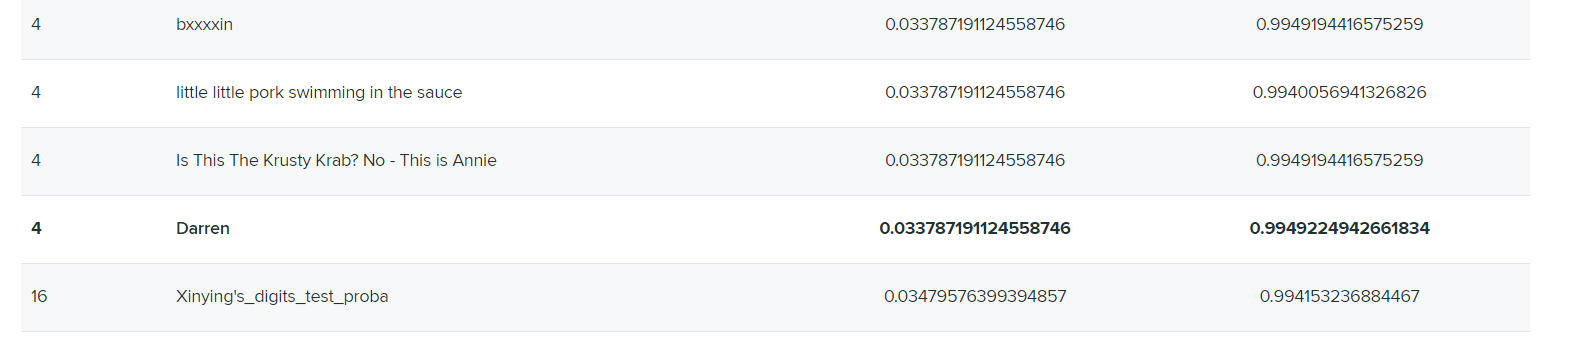

In [10]:
from IPython.display import Image
Image("table.png")